In [ ]:
### importare pandas, seaborn e matplotlib


### IMPORT DEI DATI

I dati sono nella cartella in formato .csv, sotto il nome 'cars.csv'. Caricare il csv in DataFrame Pandas. NB. il dataset originale è disponibile qui: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=Car+details+v3.csv

In [ ]:
### importare i dati con pd.read_csv()
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
 

In [ ]:
df = pd.read_csv("Roberto Montaguti - cars.csv")

In [ ]:
df.shape

(7906, 15)

### TRAIN/TEST SPLIT

In [ ]:
# importare train_test_split da sklearn.model_selection
from sklearn.model_selection import train_test_split



In [ ]:
# Dividere il dataset in train/test set, utilizzando una test_size=0.25, shuffle=True, random_state=22
train_df, test_df = train_test_split(df, test_size=0.25, shuffle=True, random_state=22)

### FEATURES & TARGET

In [ ]:
### creare X_train e X_test selezionando solo le features 'km_driven','mileage','max_power','seats'
features =["km_driven","mileage","max_power","seats"]
x_train=train_df[features].copy()
x_test=test_df[features].copy()

In [ ]:
### creare y_train e y_test, il nome del target è 'selling_price'
y_train=train_df["selling_price"].copy()
y_test=test_df["selling_price"].copy()

### STANDARDIZATION

In [ ]:
### importare StandardScaler da sklearn.preprocessing
from sklearn.preprocessing import StandardScaler 


In [ ]:
### eseguire .fit_transform sulle feature del train set
scaler =StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)


In [ ]:
### usare lo scaler fittato per fare .transform sulle feature del test set
X_test_scaled = scaler.transform(x_test)

### FITTING

In [ ]:
### importare KNearestNeighbors da sklearn.neighbors
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
### eseguire il fitting del modello sul train_df_scaled, usando la funzione .fit()
model = KNeighborsRegressor()
model = model.fit(X_train_scaled, y_train)

### PREDICTION

In [ ]:
### fare previsioni sia sul train_df_scaled che sul test_df_scaled usando la funzione .predict()
train_preds = model.predict(X_train_scaled)
test_preds = model.predict(X_test_scaled)

### EVALUATION

In [ ]:
### importare mean_absolute_error e r2_score da sklearn.metrics
def evaluate(targets, preds, title, plots=True, verbose=True):

    from sklearn.metrics import mean_absolute_error, r2_score
    
    mae = mean_absolute_error(targets, preds)
    r2 = r2_score(targets, preds)
    
    if verbose:
        print(title)
        print('MAE: ', mae)
        print('R2: ', r2)
    
    if plots:
        ###### previsioni VS targets
        sns.scatterplot(x=targets, y=preds)
        ###### retta di perfect fit
        plt.plot(range(0,targets.max()), range(0,targets.max()), label='perfect fit')
        plt.title(title)
        plt.legend()
        plt.show()
    
    return {'mae':mae, 'r2':r2}

TRAIN SET
MAE:  95590.26550851745
R2:  0.9423445632004421


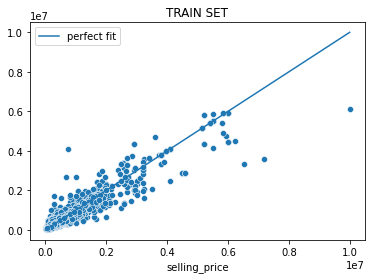

TEST SET
MAE:  116455.68042488619
R2:  0.8953150635381143


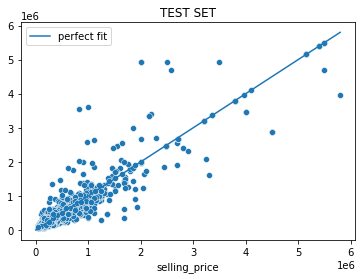

In [ ]:
### calcolare MAE e R2 del modello sia sul train_set che sul test_set, e poi printarli
train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET')
test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET')

### TUNING

In [ ]:
### Provare a trovare un buon valore di n_neighbors
train_r2_list = list()
test_r2_list = list()

k_list = range(1, 50)

for k in k_list:
    
    print('\nK:',k)
    
    model = KNeighborsRegressor(n_neighbors = k)
    model = model.fit(x_train, y_train)
    
    ### EVALUATION
    train_preds = model.predict(x_train)
    test_preds = model.predict(x_test)

    train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET', plots=False, verbose=True)
    test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET', plots=False, verbose=True)
    
    train_r2_list += [train_metrics['r2']]
    test_r2_list += [test_metrics['r2']]


K: 1
TRAIN SET
MAE:  19596.938269522685
R2:  0.9949926258673502
TEST SET
MAE:  144297.92817400102
R2:  0.8781351246822883

K: 2
TRAIN SET
MAE:  86061.4121268342
R2:  0.9535104262470714
TEST SET
MAE:  147116.2124430956
R2:  0.8786864568444854

K: 3
TRAIN SET
MAE:  115923.33114072075
R2:  0.918193738509086
TEST SET
MAE:  152024.43146181083
R2:  0.8698554748577397

K: 4
TRAIN SET
MAE:  133582.9747849553
R2:  0.8866706353946758
TEST SET
MAE:  161424.9859635812
R2:  0.8503581948778455

K: 5
TRAIN SET
MAE:  146831.9785798617
R2:  0.8590255026292705
TEST SET
MAE:  168403.9085483055
R2:  0.8295588880422073

K: 6
TRAIN SET
MAE:  156233.52740765727
R2:  0.8394553918386609
TEST SET
MAE:  171863.07502950597
R2:  0.8244490944408855

K: 7
TRAIN SET
MAE:  164659.62561742528
R2:  0.8220646249449185
TEST SET
MAE:  175716.16569116263
R2:  0.8180192946912093

K: 8
TRAIN SET
MAE:  172070.90858492156
R2:  0.8064209725115348
TEST SET
MAE:  177142.94606727365
R2:  0.8121423083596251

K: 9
TRAIN SET
MAE:  17

<function matplotlib.pyplot.show>

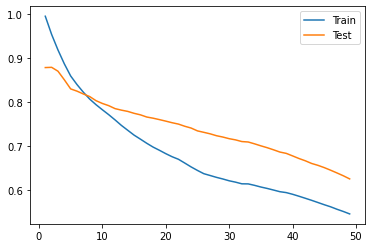

In [ ]:
plt.plot(k_list, train_r2_list, label="Train")
plt.plot(k_list, test_r2_list, label="Test")
plt.legend()
plt.show

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
